In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANJALI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [6]:
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle

In [7]:
#Exploratory data analysis

In [8]:
data=pd.read_csv(r"C:\Users\ANJALI\Downloads\amazon_alexa.tsv",delimiter='\t',quoting = 3)

In [9]:
data.shape

(3150, 5)

In [10]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [11]:
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [12]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [13]:
data[data['verified_reviews'].isna()==True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [14]:
data.dropna(inplace=True)

In [15]:
data.shape

(3149, 5)

In [16]:
data['length']=data['verified_reviews'].apply(len)

In [17]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [18]:
#randomly checking
print(f"'verified reviews' column value:{data.iloc[10]['verified_reviews']}")
print(f"length of review : {len(data.iloc[10]['verified_reviews'])}")
print(f"'length' column value:{data.iloc[10]['length']}")

'verified reviews' column value:"I sent it to my 85 year old Dad, and he talks to it constantly."
length of review : 65
'length' column value:65


In [19]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [20]:
#Analyzing rating column

In [21]:
print(f"Rating value count:\n{data['rating'].value_counts()}")

Rating value count:
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


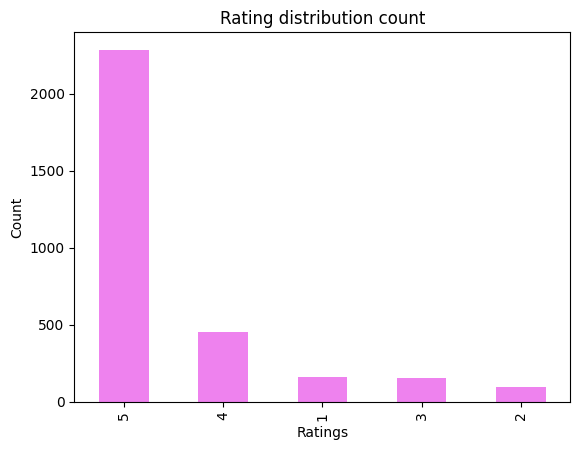

In [22]:
data['rating'].value_counts().plot.bar(color='violet')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [23]:
#finding percentage dsbn of each rating
print(f"rating value count -percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

rating value count -percentage distribution: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


<Axes: ylabel='True'>

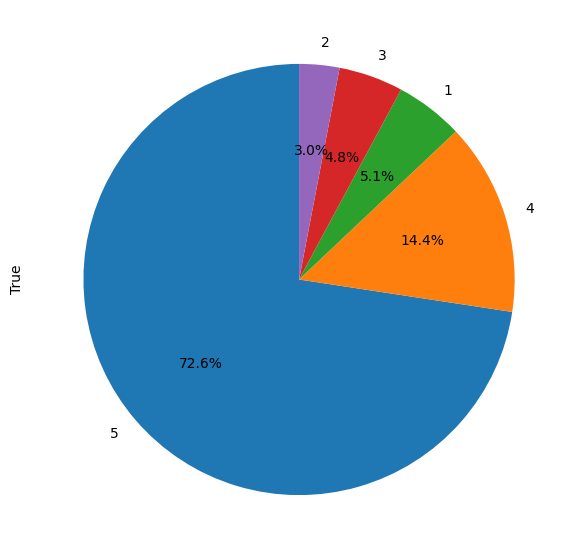

In [24]:
#Pie chart
plt.figure(figsize=(7,7))
tags=data['rating'].value_counts()/data.shape[0]
tags.plot(kind='pie',autopct="%0.1f%%",startangle=90,label=True)

In [25]:
from io import BytesIO
graph=BytesIO()

In [26]:
#Analyzing feedback column

In [27]:
print(f"feedback value count: \n{data['feedback'].value_counts()}")

feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


In [28]:
#extracting the verified reviews value for one record with feedback=0
review_0=data[data['feedback']==0].iloc[1]['verified_reviews']

In [29]:
print(review_0)
#0 represent negative review

Sound is terrible if u want good music too get a bose


In [30]:
#extracting the verified reviews value for one record with feedback=1

In [31]:
review_1=data[data['feedback']==1].iloc[1]['verified_reviews']
print(review_1)
#1 represent a positive review

Loved it!


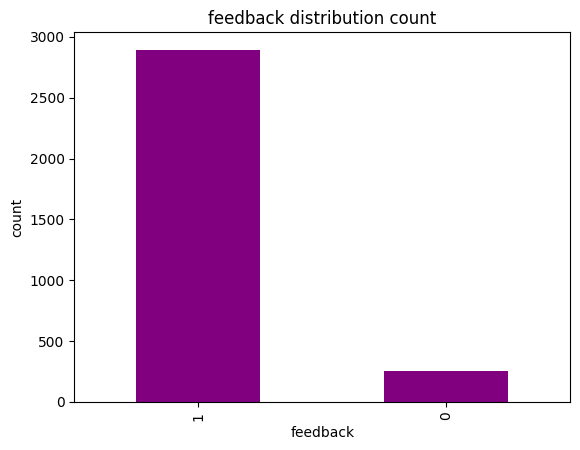

In [32]:
data['feedback'].value_counts().plot.bar(color='purple')
plt.title('feedback distribution count')
plt.xlabel('feedback')
plt.ylabel('count')
plt.show()

In [33]:
#finding the percentage dsbn of each feedback.
print(f"feedback value count-percentage distribution:\n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

feedback value count-percentage distribution:
feedback
1    91.87
0     8.13
Name: count, dtype: float64


<Axes: ylabel='True'>

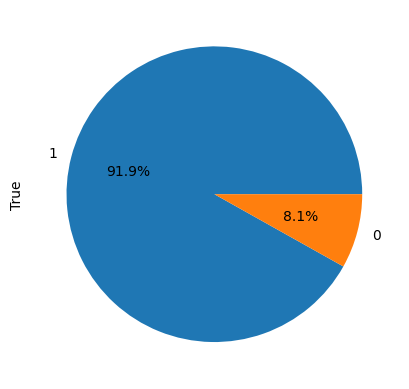

In [34]:
tags=data['feedback'].value_counts()/data.shape[0]
tags.plot(kind='pie',autopct="%0.1f%%",label=True)

In [35]:
#feedback=0
data[data['feedback']==0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [36]:
#feedback=1
data[data['feedback']==1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [37]:
#Analyzing variation column

In [38]:
print(f"variation value count: \n{data['variation'].value_counts()}")

variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


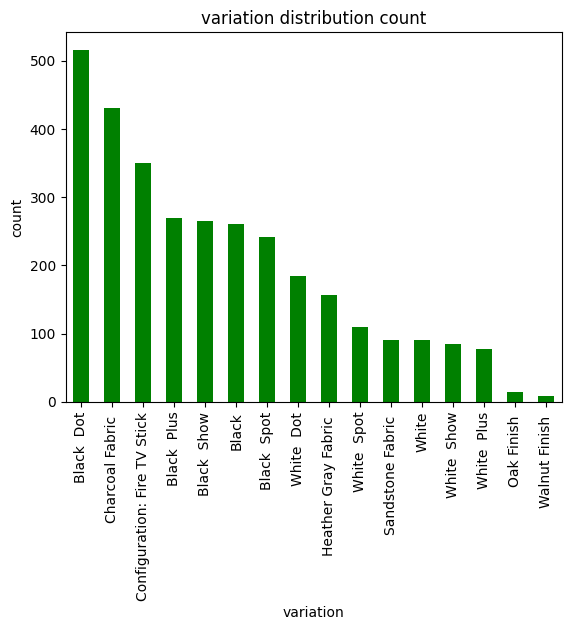

In [39]:
data['variation'].value_counts().plot.bar(color='green')
plt.title('variation distribution count')
plt.xlabel('variation')
plt.ylabel('count')
plt.show()

In [40]:
print(f"variation vale count-percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

variation vale count-percentage distribution: 
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [41]:
#mean rating according to variation
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

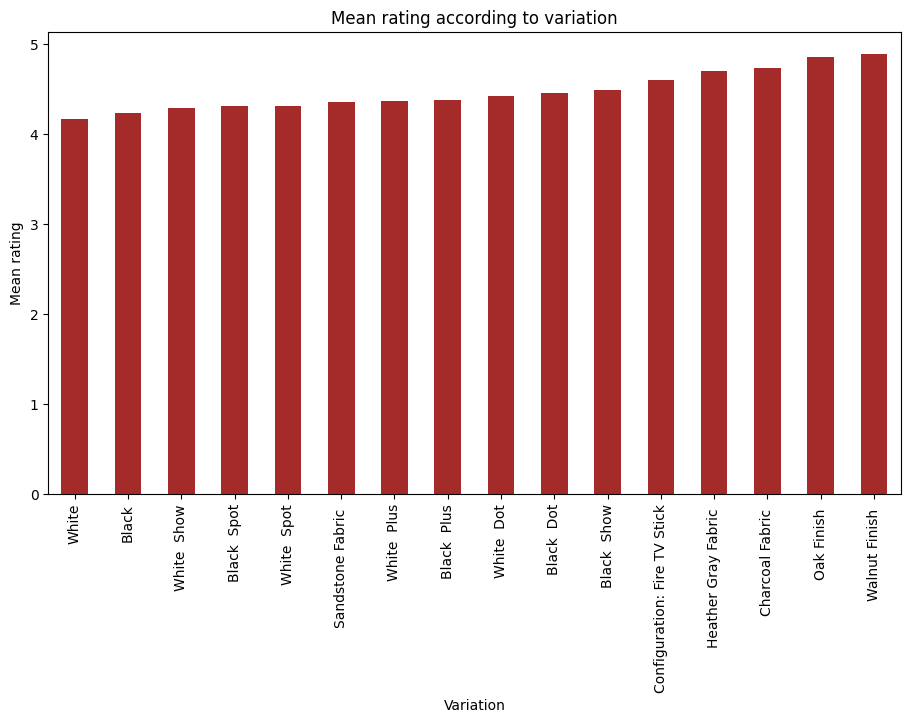

In [42]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color='brown',figsize=(11,6))
plt.title("Mean rating according to variation")
plt.xlabel("Variation")
plt.ylabel("Mean rating")
plt.show()

In [43]:
#Analyzing verified reviews column

In [44]:
data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of review')]

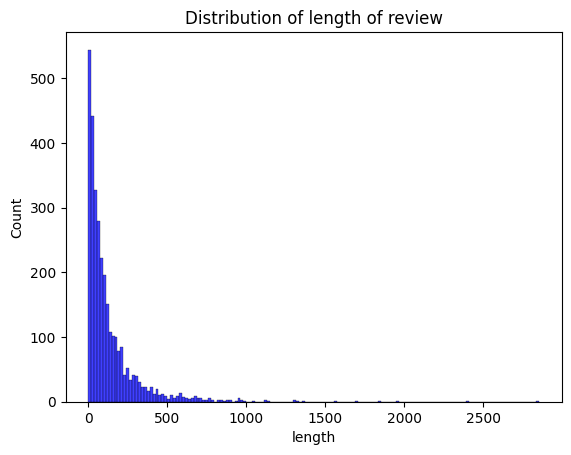

In [45]:
sns.histplot(data['length'],color='blue').set(title='Distribution of length of review')

[Text(0.5, 1.0, 'Dsbn of length of review if feedback=0')]

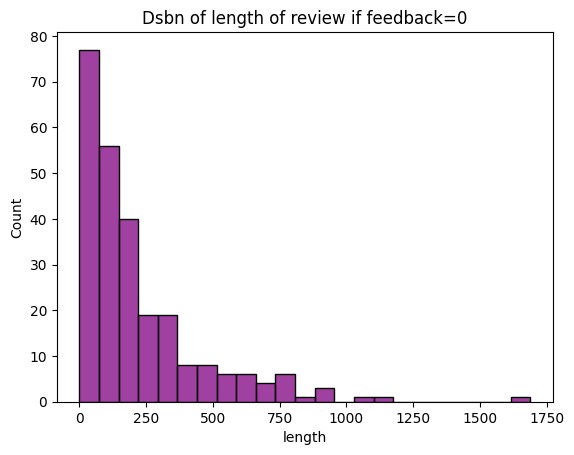

In [46]:
#when feedback is negative
sns.histplot(data[data['feedback']==0]['length'],color='purple').set(title='Dsbn of length of review if feedback=0')

[Text(0.5, 1.0, 'Dsbn of length of review if feedback=0')]

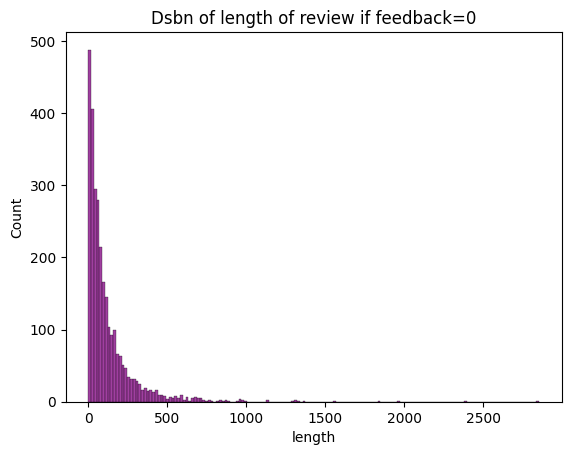

In [47]:
#when feedback is positive
sns.histplot(data[data['feedback']==1]['length'],color='purple').set(title='Dsbn of length of review if feedback=0')

In [48]:
#length wise mean rating

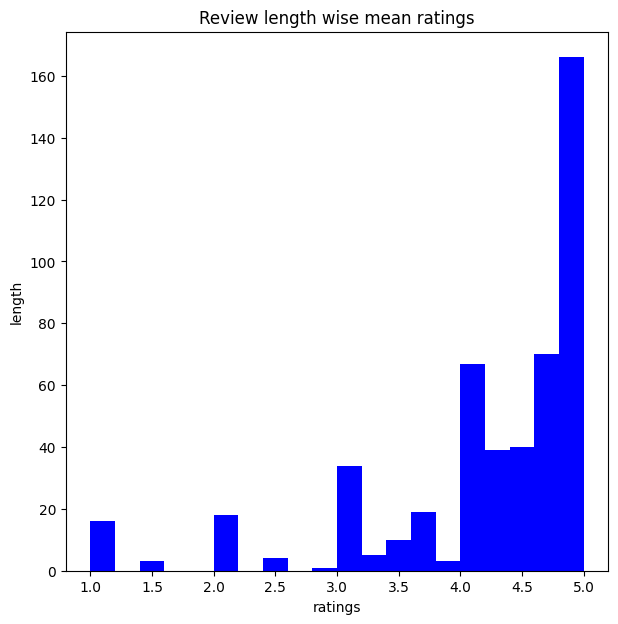

In [49]:
data.groupby('length')['rating'].mean().plot.hist(color='blue',figsize=(7,7),bins=20)
plt.title("Review length wise mean ratings")
plt.xlabel("ratings")
plt.ylabel("length")
plt.show()

In [50]:
cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(data.verified_reviews)

In [51]:
#combine all reviews
reviews=" ".join([review for review in data['verified_reviews']])

In [52]:
wc=WordCloud(background_color='white',max_words=50)

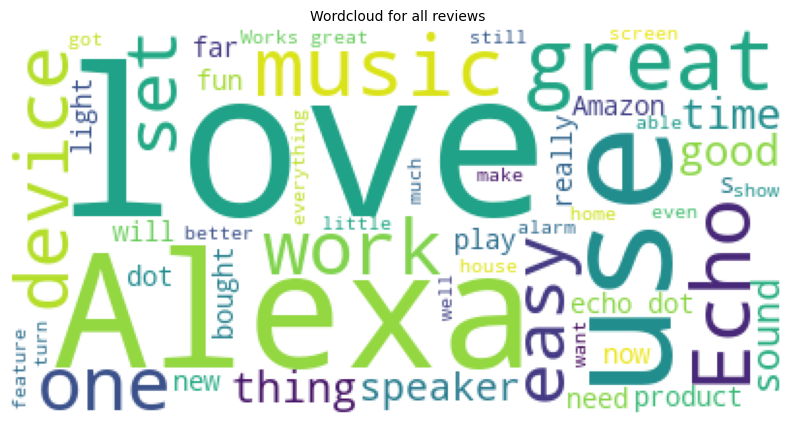

In [53]:
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews',fontsize=10)
plt.axis('off')
plt.show()

In [54]:
neg_reviews=" ".join([review for review in data[data['feedback']==0]["verified_reviews"]])
neg_reviews=neg_reviews.lower().split()

In [55]:
pos_reviews=" ".join([review for review in data[data['feedback']==1]["verified_reviews"]])
pos_reviews=pos_reviews.lower().split()

In [56]:
unique_negative=[x for x in neg_reviews if x not in pos_reviews]
unique_negative=" ".join(unique_negative)

In [57]:
unique_positive=[x for x in pos_reviews if x not in neg_reviews]
unique_positive=" ".join(unique_positive)

In [58]:
wc=WordCloud(background_color="white",max_words=50)

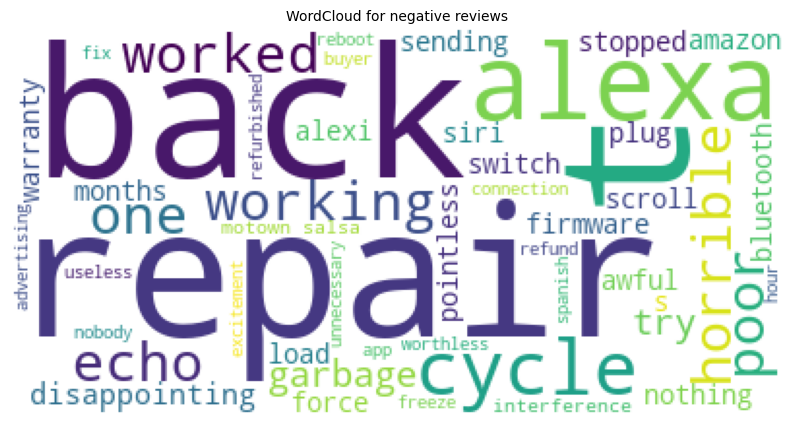

In [59]:
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('WordCloud for negative reviews',fontsize=10)
plt.axis('off')
plt.show()

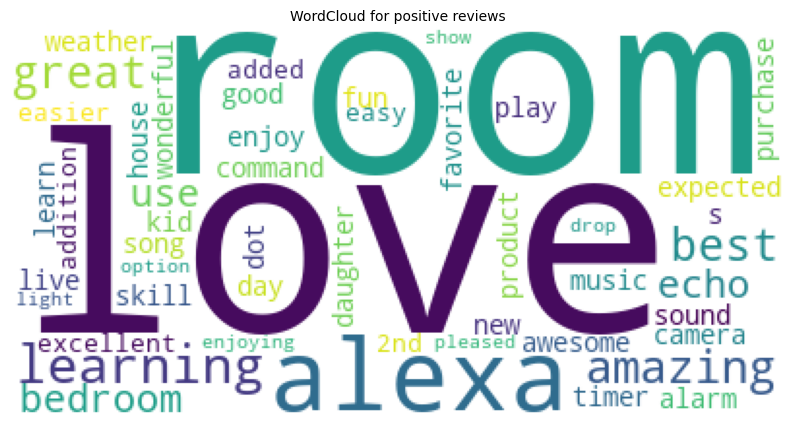

In [60]:
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('WordCloud for positive reviews',fontsize=10)
plt.axis('off')
plt.show()

# PREPROCESSING AND MODELLING

In [61]:
#To build corpus----first replace any non alphabet characters with a space,convert to lower case
#and split into words,iterate over the individual words

In [64]:
import re
corpus=[]
stemmer=PorterStemmer()
for i in range(0,data.shape[0]):
    review=re.sub('[^a-zA-Z]',' ',data.iloc[i]['verified_reviews'])
    review=review.lower().split()
    review=[stemmer.stem(word) for word in review if not word in STOPWORDS]
    review=' '.join(review)
    corpus.append(review)

In [66]:
#Using Countvectorizer to create bag of words

In [67]:
cv=CountVectorizer(max_features=2500)
x=cv.fit_transform(corpus).toarray()
y=data['feedback'].values

In [68]:
x.shape

(3149, 2500)

In [69]:
y.shape

(3149,)

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)

In [73]:
x_train.shape,x_test.shape

((2519, 2500), (630, 2500))

In [74]:
y_train.shape,y_test.shape

((2519,), (630,))

In [75]:
x_train.max()

12

In [76]:
x_test.max()

7

In [77]:
#scale x_train and x_test so that all values are between 0 and 1

In [78]:
scaler=MinMaxScaler()
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.fit_transform(x_test)

In [79]:
#random forest

In [80]:
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [81]:
print("Training accuracy:",model_rf.score(x_train_scale,y_train))
print("Test accuracy:",model_rf.score(x_test_scale,y_test))

Training accuracy: 0.9404525605398968
Test accuracy: 0.9301587301587302


In [82]:
y_pred=model_rf.predict(x_test_scale)

In [83]:
cm=confusion_matrix(y_test,y_pred)

<Axes: >

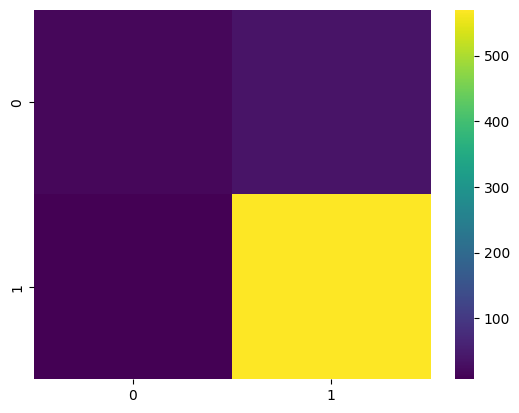

In [84]:
sns.heatmap(cm,cmap='viridis',label=True)

In [85]:
#k fold validation

In [86]:
accuracies=cross_val_score(estimator=model_rf,X=x_train_scale,y=y_train,cv=10)

In [87]:
accuracies.mean()

0.9376794409662935

In [88]:
accuracies.std()

0.011620161079013295

In [89]:
#Applying grid search to get the optimal parameters on random forest

In [90]:
params={
    'bootstrap':[True],
    'max_depth':[80,100],
    'min_samples_split':[8,12],
    'n_estimators':[100,300]
}

In [91]:
cv_object=StratifiedKFold(n_splits=2)
grid_search=GridSearchCV(estimator=model_rf,param_grid=params,cv=cv_object,verbose=0,return_train_score=True)
grid_search.fit(x_train_scale,y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [92]:
#Getting best parameters from the grid search

In [93]:
format(grid_search.best_params_)

"{'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 100}"

In [94]:
#mean accuracy on train_set
format(grid_search.cv_results_['mean_train_score'].mean()*100)

'96.82418728015432'

In [95]:
#mean accuracy on test_set
format(grid_search.cv_results_['mean_test_score'].mean()*100)

'92.22414882685929'

In [96]:
#accuracy score for test set
accuracy_score(y_test,y_pred)

0.9301587301587302

In [111]:
#***********************************************************************************#